In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
G = nx.erdos_renyi_graph(3000, 0.005)
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

In [3]:
# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 2988
Number of deinfluenced nodes: 0
Number of susceptible nodes: 12
influencer {1537, 1286, 1031, 1799, 2827, 1676, 1931, 910, 2444, 2577, 2449, 1043, 2452, 2963, 2837, 32, 1061, 1062, 299, 2219, 1070, 2613, 438, 695, 824, 1980, 1215, 2497, 2243, 1611, 594, 2006, 855, 2392, 343, 1626, 2393, 2013, 1375, 994, 2019, 105, 1009, 2034, 499, 2933, 632, 2681, 1402, 2299}


In [4]:
# Run simulation for different values of k
budget_list = list(range(1, 201))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (2, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (3, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (4, {'Random': {1898}, 'High Degree': {1898}, 'Low Degree': {1898}}), (5, {'Random': {2924}, 'High Degree': {936}, 'Low Degree': {1898}}), (6, {'Random': {525}, 'High Degree': {279}, 'Low Degree': {1898}}), (7, {'Random': {1198}, 'High Degree': {165}, 'Low Degree': {1898}}), (8, {'Random': {10}, 'High Degree': {10}, 'Low Degree': {1898}}), (9, {'Random': {988}, 'High Degree': {39}, 'Low Degree': {936, 1898}}), (10, {'Random': {10}, 'High Degree': {36}, 'Low Degree': {936, 1898}}), (11, {'Random': {2673}, 'High Degree': {41}, 'Low Degree': {936, 1898}}), (12, {'Random': {1408}, 'High Degree': {1}, 'Low Degree': {936, 1898}}), (13, {'Random': {1096}, 'High Degree': {11}, 'Low Degree': {936, 1898}}), (14, {'Random': {1811}, 'High Degree': {5}, 'Low Degree': {936, 1898, 979}}), (15, {'Random

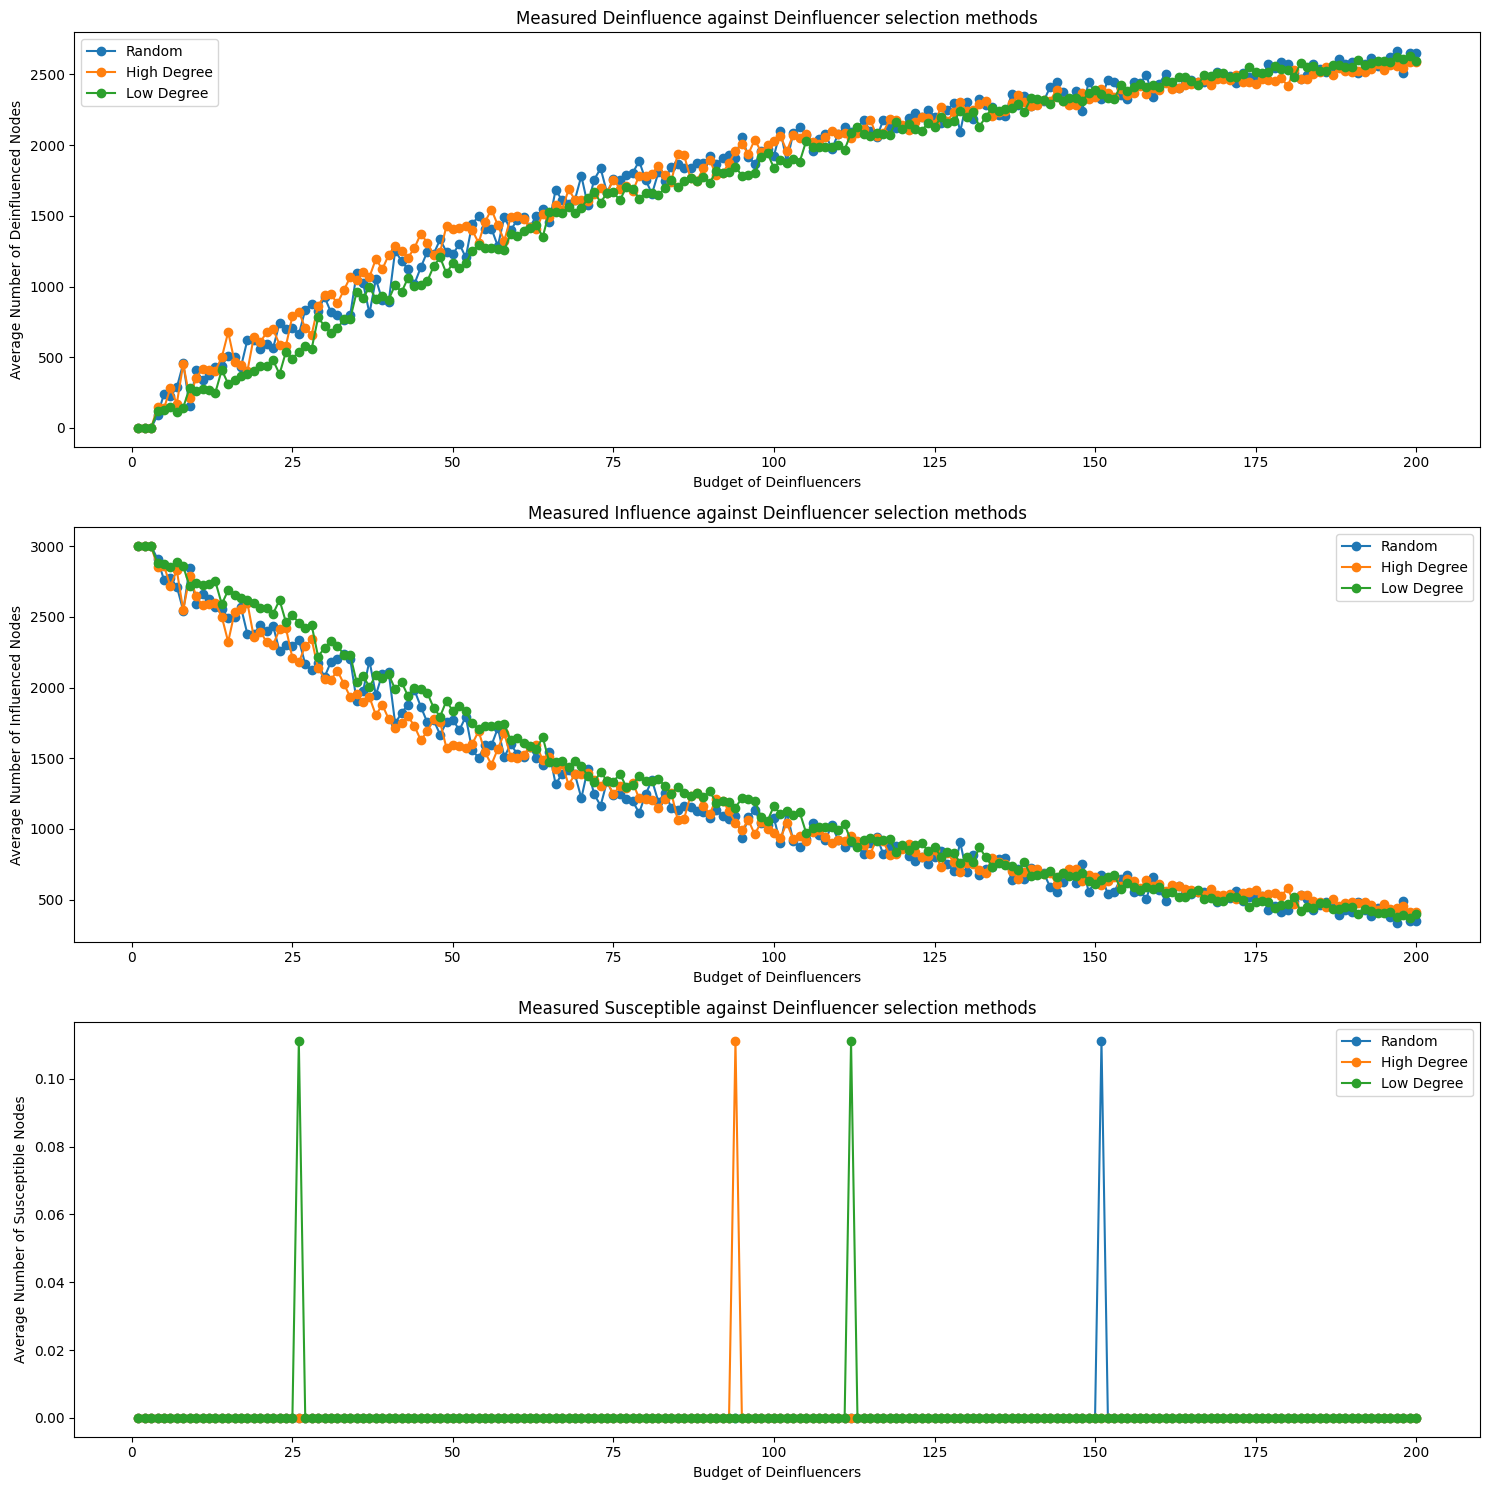

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(1, 251))
deinfluencers_list = ef.select_deinfluencers_budget_naive(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (2, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (3, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (4, {'Random': set(), 'High Degree': set(), 'Low Degree': {1898}}), (5, {'Random': set(), 'High Degree': set(), 'Low Degree': {1898}}), (6, {'Random': set(), 'High Degree': set(), 'Low Degree': {1898}}), (7, {'Random': set(), 'High Degree': set(), 'Low Degree': {1898}}), (8, {'Random': set(), 'High Degree': set(), 'Low Degree': {1898}}), (9, {'Random': set(), 'High Degree': set(), 'Low Degree': {936, 1898}}), (10, {'Random': set(), 'High Degree': set(), 'Low Degree': {936, 1898}}), (11, {'Random': set(), 'High Degree': set(), 'Low Degree': {936, 1898}}), (12, {'Random': set(), 'High Degree': set(), 'Low Degree': {936, 1898}}), (13, {'Random': set(), 'High Degree': set(), 'Low Degree': {936, 1898}}), (14, {'Random': set(), 'High Degree': set(), 'Low Degree': {936, 1898, 979}}), (15, {'Ran

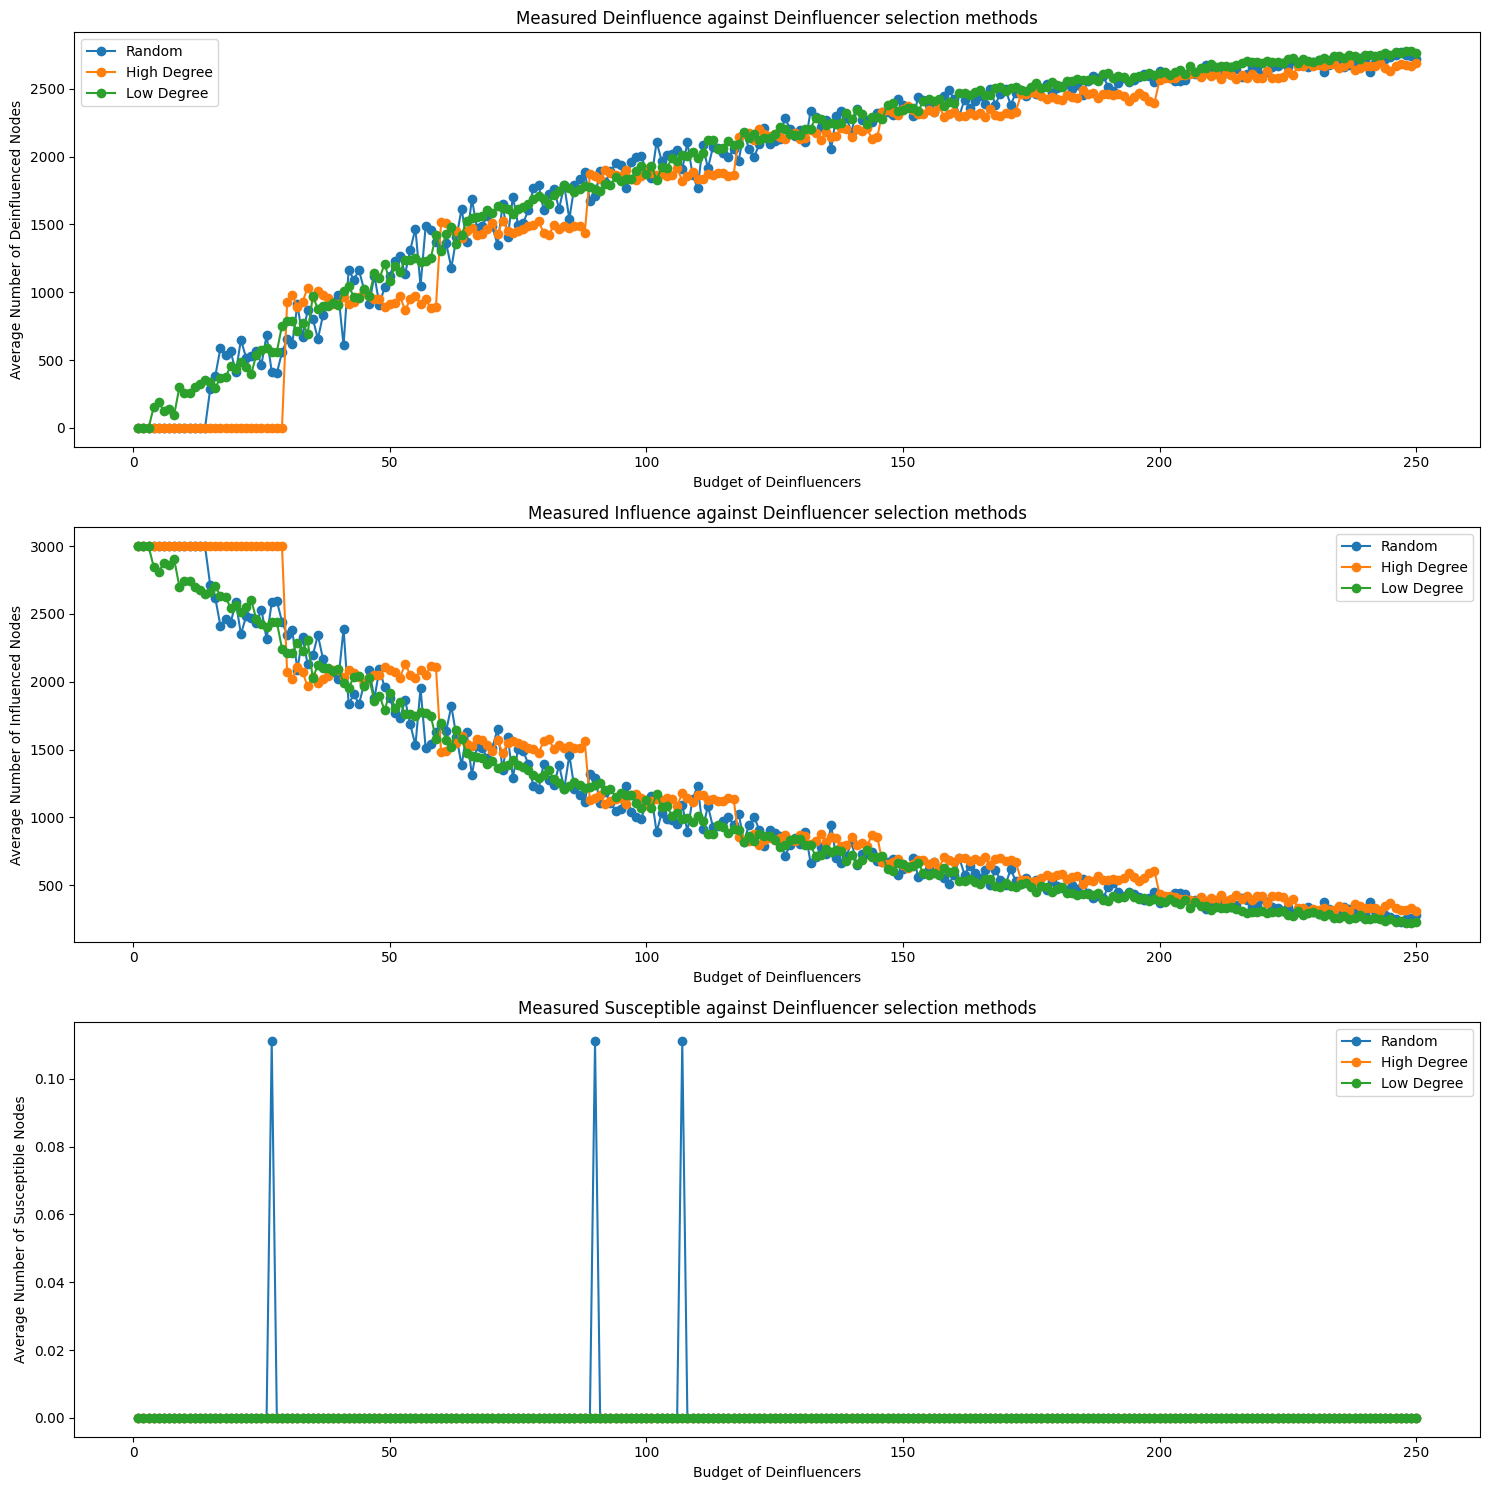

In [7]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()